In [33]:
import numpy as np
import pandas as pd
import cv2
import statistics
import os
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle
import datetime
import pickle

In [38]:
path = "utk-data/UTKFace/"
files = os.listdir(path)
size = len(files)

image = []
age = []
gender = []
ethnicity = []
image_man = []
age_man =[]
gender_man = []
ethnicity_man = []
image_woman = []
age_woman =[]
gender_woman = []
ethnicity_woman = []

for file in files:    
    img = cv2.imread(path+file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (100, 100))
    image.append(img)
    split_var = file.split('_')
    age.append(split_var[0])
    gender.append(int(split_var[1]))
    ethnicity.append(int(split_var[2]))
   
    if int(split_var[1]) == 1:
        image_woman.append(img)
        age_woman.append(split_var[0])
        gender_woman.append(int(split_var[1]))
        ethnicity_woman.append(int(split_var[2]))
    elif int(split_var[1]) == 0: 
        image_man.append(img)
        age_man.append(split_var[0])
        gender_man.append(int(split_var[1]))
        ethnicity_man.append(int(split_var[2]))
        
        
age = np.array(age, dtype = np.uint8)
gender = np.array(gender, dtype = np.uint8)
ethnicity = np.array(ethnicity, dtype = np.uint8)
image, gender, age, ethnicity = shuffle(image, gender, age, ethnicity, random_state=0)
age_man = np.array(age_man, dtype = np.uint8)
gender_man = np.array(gender_man, dtype = np.uint8)
ethnicity_man = np.array(ethnicity_man, dtype = np.uint8)
image_man, gender_man, age_man, ethnicity_man = shuffle(image_man, gender_man, age_man, ethnicity_man, random_state=0)
age_woman = np.array(age_woman, dtype = np.uint8)
gender_woman = np.array(gender_woman, dtype = np.uint8)
ethnicity_woman = np.array(ethnicity_woman, dtype = np.uint8)
image_woman, gender_woman, age_woman, ethnicity_woman = shuffle(image_woman, gender_woman, age_woman, ethnicity_woman, random_state=0)

test_image = image[20000:]
train_image = image[:20000]

test_gender = gender[20000:]
train_gender = gender[:20000]    

test_age = age[20000:]
train_age = age[:20000]

test_ethnicity = ethnicity[20000:]
train_ethnicity = ethnicity[:20000]

## Descriptive statistics

### Distribution

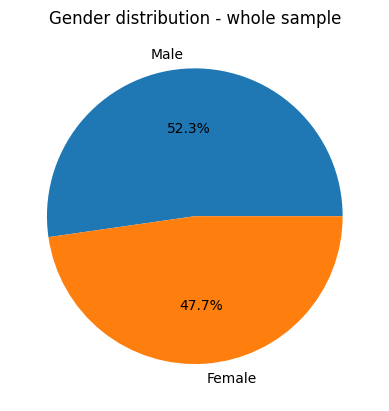

In [68]:
x_gender = set(gender)
y_gender = [gender[gender==i].size for  i in x_gender]
data = {'Male':y_gender[0], 'Female': y_gender[1]}

x= list(data.keys())
y = list(data.values())

fig, ax = plt.subplots()
ax.pie((y), labels=(x), autopct='%1.1f%%')
plt.title('Gender distribution - whole sample')
plt.show()

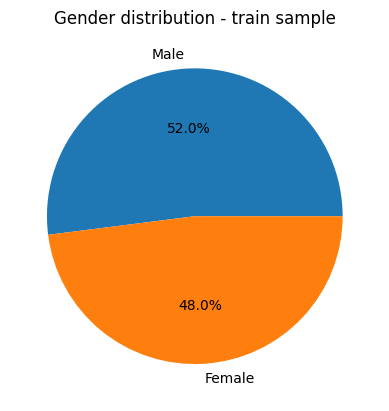

In [67]:
x_gender = set(train_gender)
y_gender = [train_gender[train_gender==i].size for  i in x_gender]
data = {'Male':y_gender[0], 'Female': y_gender[1]}
x= list(data.keys())
y = list(data.values())

fig, ax = plt.subplots()
ax.pie((y), labels=(x), autopct='%1.1f%%')
plt.title('Gender distribution - train sample')
plt.show()

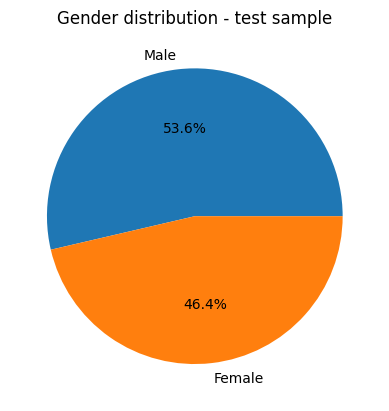

In [66]:
x_gender = set(test_gender)
y_gender = [test_gender[test_gender==i].size for  i in x_gender]
data = {'Male':y_gender[0], 'Female': y_gender[1]}
x= list(data.keys())
y = list(data.values())

fig, ax = plt.subplots()
ax.pie((y), labels=(x), autopct='%1.1f%%')
plt.title('Gender distribution - test sample')
plt.show()

Distribution of gender in the whole sample is similar to the distribution in train and test samples.

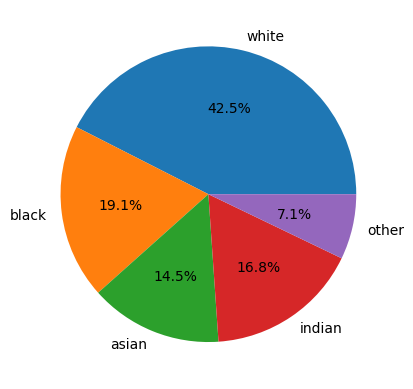

In [64]:
ethnic_map = {0: 'white', 1:'black', 2:'asian', 3:'indian', 4:'other'}
y_ethnic = [ethnicity[ethnicity==i].size for  i in ethnic_map.keys()]
data = dict(zip(ethnic_map.values(), y_ethnic))
x= list(data.keys())
y = list(data.values())

fig, ax = plt.subplots()
ax.pie((y), labels=(x), autopct='%1.1f%%')
plt.show()

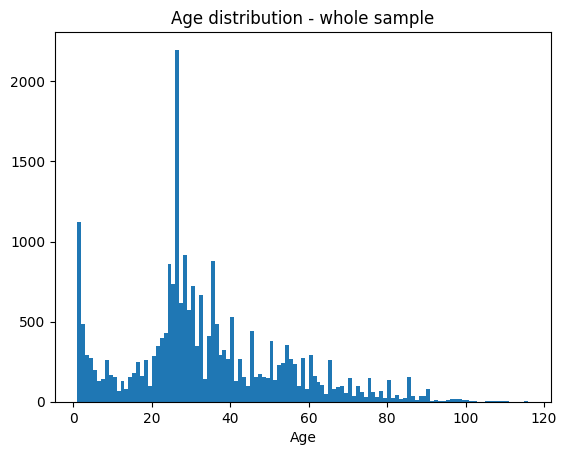

In [23]:
x_age = list(set(age))

fig, ax = plt.subplots()
ax.hist(age, x_age, cumulative=False)
ax.set_xlabel('Age')
ax.set_title('Age distribution - whole sample')
plt.show()

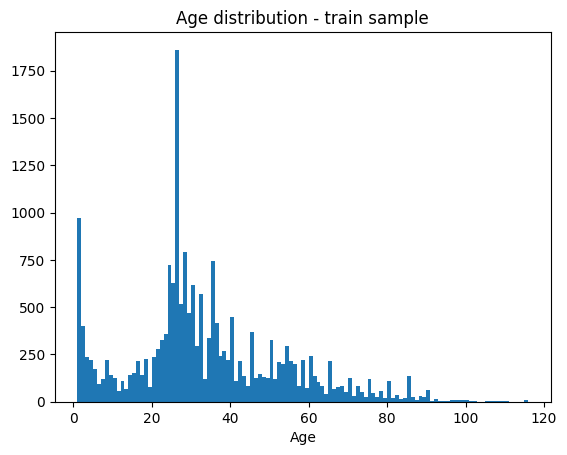

In [24]:
x_age = list(set(age))

fig, ax = plt.subplots()
ax.hist(train_age, x_age, cumulative=False)
ax.set_xlabel('Age')
ax.set_title('Age distribution - train sample')
plt.show()

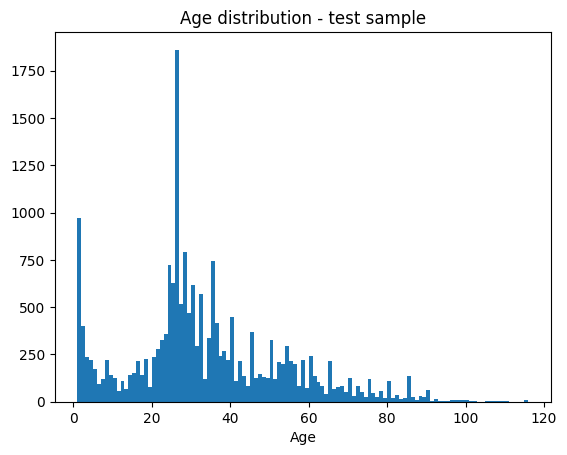

In [25]:
x_age = list(set(age))

fig, ax = plt.subplots()
ax.hist(train_age, x_age, cumulative=False)
ax.set_xlabel('Age')
ax.set_title('Age distribution - test sample')
plt.show()

Distribution of age in the whole sample is similar to the distribution in train and test samples.

### Measures of Central Tendency

In [43]:
print('Mean age in whole sample: ', statistics.mean(age))
print('Mean age among man: ', statistics.mean(age_man))
print('Mean age among woman: ', statistics.mean(age_woman))

Mean age in whole sample:  33
Mean age among man:  35
Mean age among woman:  30


In [44]:
print('Median age in whole sample: ', statistics.median(age))
print('Median age among man: ', statistics.median(age_man))
print('Median age among woman: ', statistics.median(age_woman))

Median age in whole sample:  29.0
Median age among man:  34
Median age among woman:  26


In [47]:
print('Mode age in whole sample: ', statistics.multimode(age))
print('Mode age among man: ', statistics.multimode(age_man))
print('Mode age among woman: ', statistics.multimode(age_woman))

Mode age in whole sample:  [26]
Mode age among man:  [26]
Mode age among woman:  [26]


### Measures of Variability

In [58]:
age_, age_man_, age_woman_ = pd.Series(age), pd.Series(age_man), pd.Series(age_woman)
print('Skewness of age in whole sample: ', statistics.stdev(age_))
print('Skewness of age among man: ', statistics.variance(age_man_))
print('Skewness of age among woman: ', statistics.variance(age_woman_))

Skewness of age in whole sample:  19.886111632794822
Skewness of age among man:  388.2958319027798
Skewness of age among woman:  390.2066926001177


### Box Plot

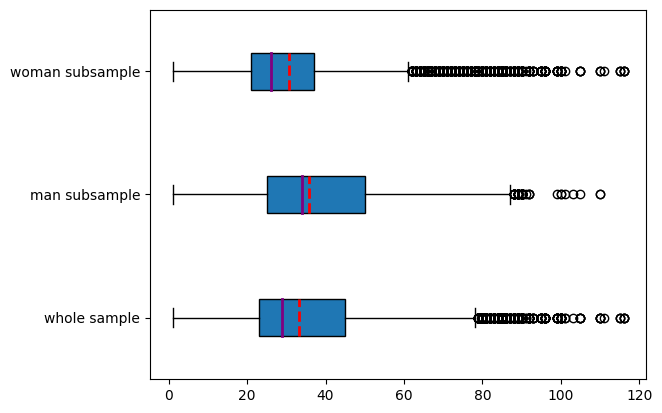

In [59]:
fig, ax = plt.subplots()
ax.boxplot((age, age_man, age_woman), vert=False, showmeans=True, meanline=True,
           labels=('whole sample', 'man subsample', 'woman subsample'), patch_artist=True,
           medianprops={'linewidth': 2, 'color': 'purple'},
           meanprops={'linewidth': 2, 'color': 'red'})
plt.show()

The mean is the red dashed line.
The median is the purple line.
The first quartile is the left edge of the blue rectangle.
The third quartile is the right edge of the blue rectangle.
The interquartile range is the length of the blue rectangle.
The range contains everything from left to right.
The outliers are the dots to the left and right.